
# Week 4 Lab - Hypothesis Testing

 This week's assignment will give you some practice defining and testing a hypothesis.

**Dataset Name::** ToothGrowth.csv 



In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline
sns.set()  

In [6]:
Tooth = pd.read_csv('ToothGrowth.csv')
Tooth.head(10)

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5
5,6,10.0,VC,0.5
6,7,11.2,VC,0.5
7,8,11.2,VC,0.5
8,9,5.2,VC,0.5
9,10,7.0,VC,0.5


In [7]:
length = Tooth['len']
length

0      4.2
1     11.5
2      7.3
3      5.8
4      6.4
5     10.0
6     11.2
7     11.2
8      5.2
9      7.0
10    16.5
11    16.5
12    15.2
13    17.3
14    22.5
15    17.3
16    13.6
17    14.5
18    18.8
19    15.5
20    23.6
21    18.5
22    33.9
23    25.5
24    26.4
25    32.5
26    26.7
27    21.5
28    23.3
29    29.5
30    15.2
31    21.5
32    17.6
33     9.7
34    14.5
35    10.0
36     8.2
37     9.4
38    16.5
39     9.7
40    19.7
41    23.3
42    23.6
43    26.4
44    20.0
45    25.2
46    25.8
47    21.2
48    14.5
49    27.3
50    25.5
51    26.4
52    22.4
53    24.5
54    24.8
55    30.9
56    26.4
57    27.3
58    29.4
59    23.0
Name: len, dtype: float64

Can I reshape the dataset to include a VC and OJ column and find the mean based off of lenght change by dosage?

(array([ 5.,  7.,  3.,  7.,  8.,  5.,  9., 11.,  3.,  2.]),
 array([ 4.2 ,  7.17, 10.14, 13.11, 16.08, 19.05, 22.02, 24.99, 27.96,
        30.93, 33.9 ]),
 <BarContainer object of 10 artists>)

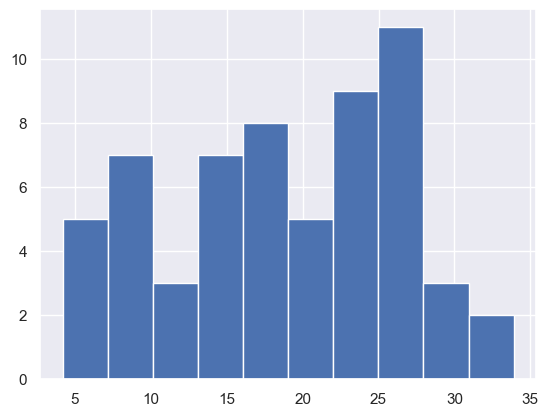

In [8]:
plt.hist(length)

This doesnt look normal, but I wouldn't go so far as to say its binomial.

c:\Users\Chris Lowson\new.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Chris Lowson\new.conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


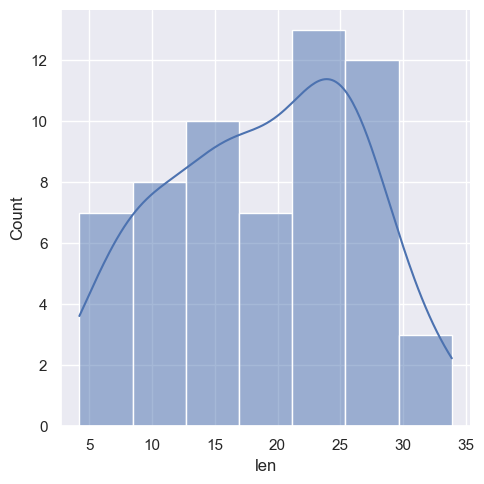

In [9]:
sns.displot(data=length, kde=True)

Hard to tell if this ir normal or not! I don't view the line as having two peaks, rather this graph is heavil skewed. 

In [10]:
import scipy.stats as stats

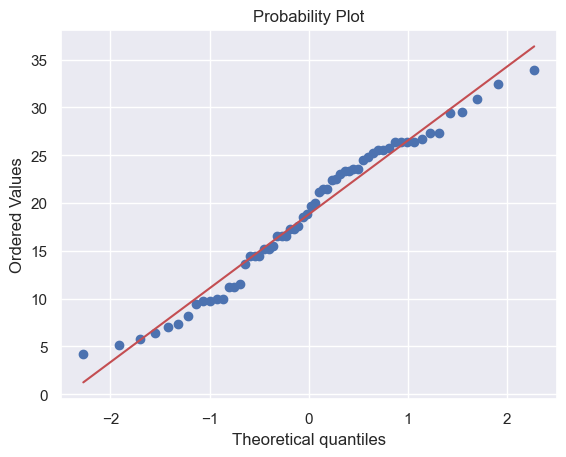

In [11]:
res = stats.probplot(length, plot=plt)

This looks a little wonky but It feels to me that this data is normally distributed. I dont have a massive gap in 'peaks' and the data tends to group along my probplot line, and its all pretty much on the line.

I want this data to be normally distributed so that I can be confidient in my analysis.. My null hypothesis (H0) will be normal distribution! Let's see if we can prove this. 

In [12]:
from scipy.stats import shapiro

In [13]:
stat, p = shapiro(length)
print('statistics=%.3f, p=%.3f' % (stat,p))

alpha = 0.05
if p > alpha:
    print('Sample looks normally distributed (fail to regect H0)')
else:
    print('Sample does not look normally distributed (reject H0)')

statistics=0.967, p=0.109
Sample looks normally distributed (fail to regect H0)


In [14]:
from scipy.stats import normaltest

stat, p = normaltest(length)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks normally distributed (fail to reject H0)')
else:
    print('Sample does not look normally distributed (reject H0)')

Statistics=6.490, p=0.039
Sample does not look normally distributed (reject H0)


Test A (shapiro) confidentally called my data normally distributed, while test B (K2) claimed the data is not normally distributed. 

Test B(k2) likes to focus on the skew of a bell curve, and my data set is quite skewed on the histogram, but I believe may be forcing k2 to call 'not normal'. As well, the p stat is reletively close to .05 (.039) That since test A (Shapiro) did call this data a normal distribution, I am inclined to beliefe test A > Test B. Lets try and prove this another way. 

From the two endpoints of my plots (5, 35) 20 would represent the mean or avergae of the data set, and would as well be another indicator of normal distribution. 

In [15]:
from scipy.stats import ttest_1samp
import numpy as np

In [16]:
ages_mean = np.mean(length)
print(f'Mean: {ages_mean}')

tset, pval = ttest_1samp(length, 20)
print(f'p-value: {pval}')

if pval < 0.05:    
   print('Reject null hypothesis')
else:
  print('Accept null hypothesis')

Mean: 18.813333333333336
p-value: 0.23429640105096125
Accept null hypothesis


Arithmatically the average is 18.8 but statistically speaking the average is 20. Again this represents the complete middle point of the histogram and leads me to believe my shapiro call of normal distribution. 

<Axes: xlabel='dose', ylabel='len'>

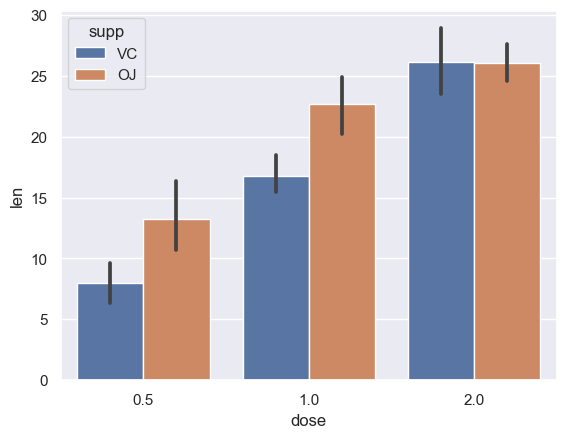

In [17]:
sns.barplot(data=Tooth,x='dose', y='len',hue='supp')

In [18]:
grow_and_dose = Tooth.drop(columns= ['Unnamed: 0', 'supp'])
grow_and_dose

,len,dose
0,4.2,0.5
1,11.5,0.5
2,7.3,0.5
3,5.8,0.5
4,6.4,0.5
5,10.0,0.5
6,11.2,0.5
7,11.2,0.5
8,5.2,0.5
9,7.0,0.5


In [19]:
ttest,pval = stats.ttest_rel(grow_and_dose['dose'], grow_and_dose['len'])
print(f'p-value: {pval}')

print(f'stat: {ttest}')
if pval < 0.05:    # alpha value is 0.05 or 5%
   print('Reject null hypothesis')
else:
  print('Accept null hypothesis')


p-value: 5.995737401641643e-27
stat: -19.105893874591374
Reject null hypothesis


In [20]:
mean_grow = grow_and_dose.groupby('dose').agg('mean')
mean_grow

,len
dose,
0.5,10.605
1.0,19.735
2.0,26.100
